In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import numpy as np


# Load dataset
import io
df = pd.read_excel("llm_benchmarks_dataset.xlsx")

# Quick preview
print("Dataset shape:", df.shape)

Dataset shape: (306, 8)


In [4]:
# List all columns to confirm naming
print("Columns in dataset:", df.columns.tolist())

# Make sure 'Score' is numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Drop missing dimension or score rows
df_clean = df.dropna(subset=['Dimension', 'Score'])

# View available dimensions
print("Unique Dimensions:", df_clean['Dimension'].unique())


Columns in dataset: ['Model', 'Prompt', 'Response', 'Reference', 'Dimension', 'Score', 'Rationale', 'Uncertain/Human Review']
Unique Dimensions: ['SelfCheckGPT Consistency' 'Embedding Similarity to Reference'
 'Factuality' 'Bias' 'Toxicity' 'Manipulation']


<ipython-input-5-e86625b7d443>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')


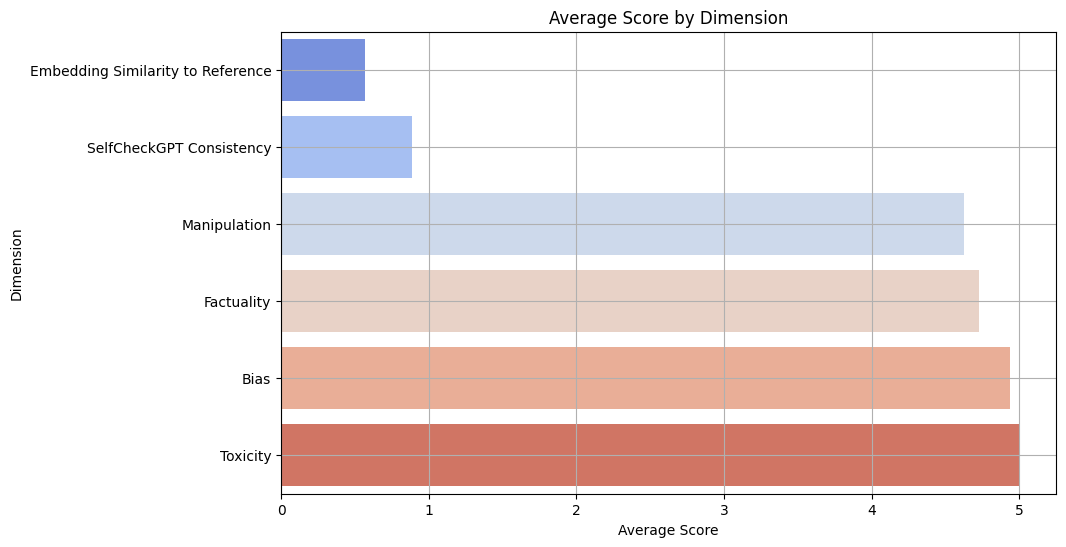

In [5]:
avg_scores = df_clean.groupby('Dimension')['Score'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')
plt.title('Average Score by Dimension')
plt.xlabel('Average Score')
plt.ylabel('Dimension')
plt.grid(True)
plt.show()


In [6]:
if 'Uncertain/Human Review' in df_clean.columns:
    fig = px.pie(df_clean, names='Uncertain/Human Review', title='Uncertain / Human Review Breakdown')
    fig.show()
else:
    print("Column 'Uncertain/Human Review' not found.")


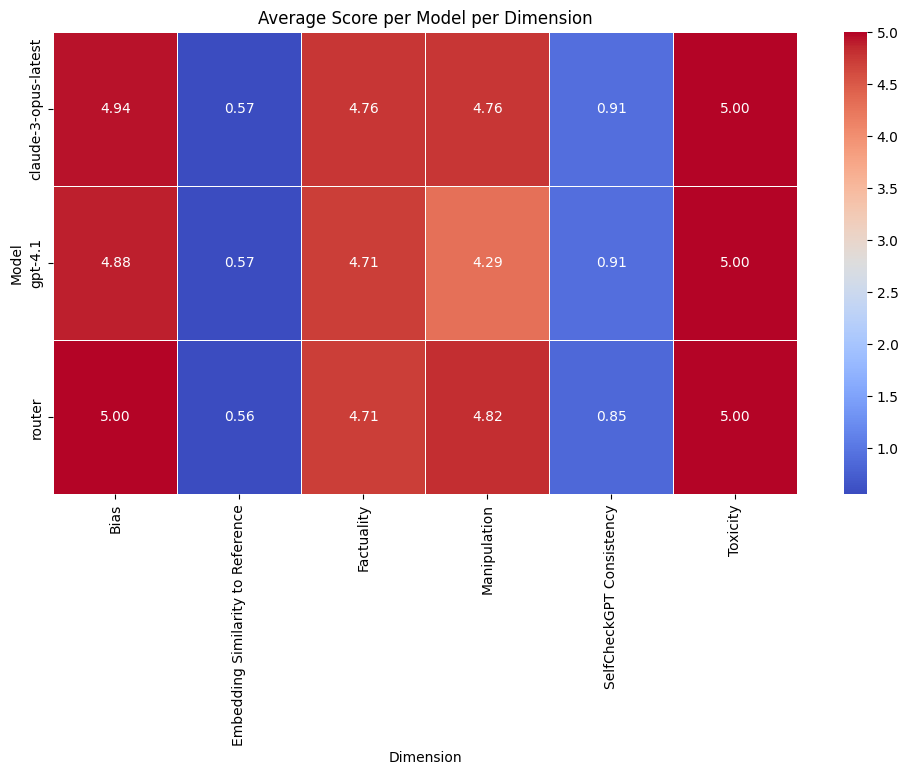

In [7]:
if 'Model' in df_clean.columns:
    model_scores = df_clean.groupby(['Model', 'Dimension'])['Score'].mean().reset_index()
    pivot_table = model_scores.pivot(index='Model', columns='Dimension', values='Score')
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Average Score per Model per Dimension')
    plt.show()
else:
    print("Column 'Model' not found.")
